<a href="https://colab.research.google.com/github/harshitamotwani/ML_DL/blob/master/Cats_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-06-18 05:55:14--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 2.19.240.142, 2a02:26f0:6b:5b3::e59, 2a02:26f0:6b:5a5::e59
Connecting to download.microsoft.com (download.microsoft.com)|2.19.240.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   184MB/s    in 4.4s    

2020-06-18 05:55:18 (177 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [4]:
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats/')
    os.mkdir('/tmp/cats-v-dogs/training/dogs/')
    os.mkdir('/tmp/cats-v-dogs/testing/cats/')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs/')

except OSError:
    pass

In [5]:
#remove data with size = 0, split the data, randomly sample the data 
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    lt=os.listdir(SOURCE)
    train_ln=int(len(lt)*SPLIT_SIZE)
    train_lt = random.sample(lt, train_ln)
    test_lt = [item for item in lt if item not in train_lt]
    print(len(train_lt))
    print(len(test_lt))
    for file in train_lt:
        source=os.path.join(SOURCE, file)
        destination = os.path.join(TRAINING, file)
        if os.path.getsize(source)==0:
            pass
        else:
            copyfile(source, destination)
    for file in test_lt:
        source=os.path.join(SOURCE, file)
        destination = os.path.join(TESTING, file)  
        if os.path.getsize(source)==0:
            pass
        else:
            copyfile(source, destination)


In [6]:
        
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

11250
1251
11250
1251


In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11249
11249
1251
1251


In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [14]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [15]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
2250/2250 [==============================] - ETA: 0s - loss: 0.5927 - acc: 0.6934

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 103s 46ms/step - loss: 0.5927 - acc: 0.6934 - val_loss: 0.5702 - val_acc: 0.6875
Epoch 2/10
2250/2250 [==============================] - 104s 46ms/step - loss: 0.4778 - acc: 0.7778 - val_loss: 0.4212 - val_acc: 0.8002
Epoch 3/10
2250/2250 [==============================] - 103s 46ms/step - loss: 0.4366 - acc: 0.8063 - val_loss: 0.4392 - val_acc: 0.8114
Epoch 4/10
2250/2250 [==============================] - 104s 46ms/step - loss: 0.4149 - acc: 0.8222 - val_loss: 0.6766 - val_acc: 0.7738
Epoch 5/10
2250/2250 [==============================] - 105s 47ms/step - loss: 0.4142 - acc: 0.8294 - val_loss: 0.4515 - val_acc: 0.8153
Epoch 6/10
2250/2250 [==============================] - 104s 46ms/step - loss: 0.3962 - acc: 0.8353 - val_loss: 0.4096 - val_acc: 0.8189
Epoch 7/10
2250/2250 [==============================] - 105s 46ms/step - loss: 0.3891 - acc: 0.8407 - val_loss: 0.4283 - val_acc: 0.8137
Epoch 8/10
2250/2250 [==============================

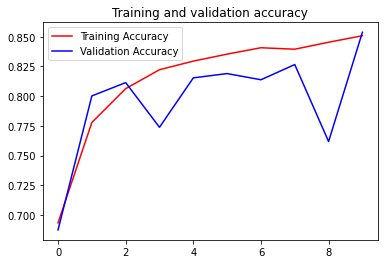

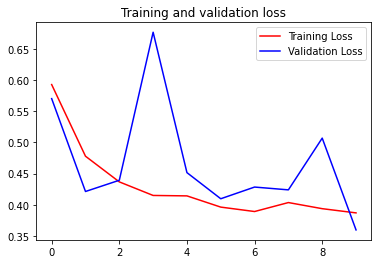

In [16]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label ="Validation Loss")
plt.title('Training and validation loss')
plt.legend()

In [12]:
#You can upload an image here and have it classified

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Using TensorFlow backend.


Saving jamie-street-lK6EwI6l6S8-unsplash.jpg to jamie-street-lK6EwI6l6S8-unsplash.jpg
[1.]
jamie-street-lK6EwI6l6S8-unsplash.jpg is a dog
